# Grey wolf optimization 

![Grey wolf algorithm](gr2.jpg)
<br>
In this notebook, we are going to take a look at the grey wolf algorithm as a part of collective intelligence.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

## The grey Wolf algorithm

![Grey wolf algorithm math formulation](GreyWolf_Pseudo_code.jpg)

## Main

Best solution:  [ 3.37358836e-09  1.44827731e-09  9.80532952e-10 -3.65587760e-09]
Best fitness:  2.780549152204287e-17


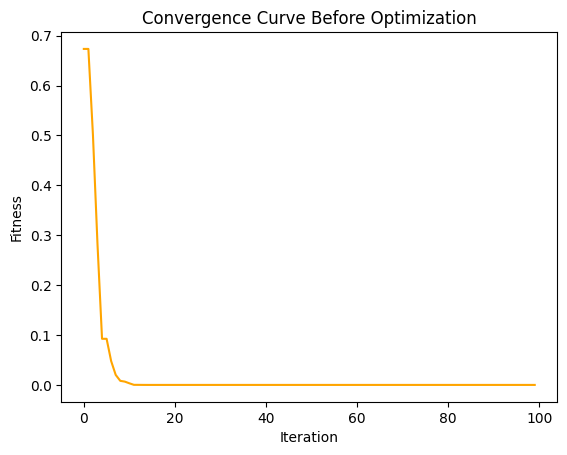

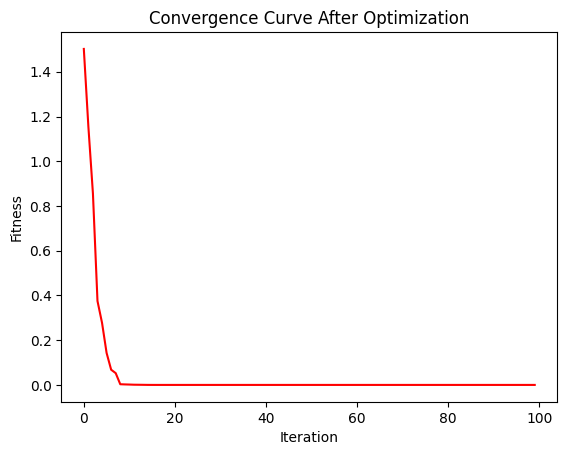

In [3]:
# Import required libraries
import numpy as np
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()

# Define objective function
def objective_function(x):
    # Calculate fitness value
    fitness = sum(x**2)
    return fitness

# Define Grey Wolf Algorithm function
def grey_wolf_algorithm(obj_func, lb, ub, dim, search_agent_no, max_iter):
    # Initialize alpha, beta, and delta wolves
    alpha_wolf_pos = np.zeros(dim)
    alpha_wolf_fitness = float("inf")
    beta_wolf_pos = np.zeros(dim)
    beta_wolf_fitness = float("inf")
    delta_wolf_pos = np.zeros(dim)
    delta_wolf_fitness = float("inf")
    # Initialize search agents
    search_agents_pos = np.zeros((search_agent_no, dim))
    search_agents_fitness = np.zeros(search_agent_no)
    # Initialize convergence curve
    convergence_curve = np.zeros(max_iter)
    # Initialize a vector to store the best position found so far
    best_pos = np.zeros(dim)
    best_fitness = float("inf")
    # Initialize the positions of search agents
    for i in range(search_agent_no):
        search_agents_pos[i, :] = np.random.uniform(lb, ub, dim)
        search_agents_fitness[i] = obj_func(search_agents_pos[i, :])
    # Main loop
    for t in range(max_iter):
        # Update alpha, beta, and delta wolves
        for i in range(search_agent_no):
            # Check if the current search agent is alpha wolf
            if search_agents_fitness[i] < alpha_wolf_fitness:
                alpha_wolf_pos = search_agents_pos[i, :]
                alpha_wolf_fitness = search_agents_fitness[i]
            # Check if the current search agent is beta wolf
            if (search_agents_fitness[i] > alpha_wolf_fitness) and (search_agents_fitness[i] < beta_wolf_fitness):
                beta_wolf_pos = search_agents_pos[i, :]
                beta_wolf_fitness = search_agents_fitness[i]
            # Check if the current search agent is delta wolf
            if (search_agents_fitness[i] > alpha_wolf_fitness) and (search_agents_fitness[i] > beta_wolf_fitness) and (search_agents_fitness[i] < delta_wolf_fitness):
                delta_wolf_pos = search_agents_pos[i, :]
                delta_wolf_fitness = search_agents_fitness[i]
        # Update the positions of search agents
        for i in range(search_agent_no):
            a = 2 - 2 * (t / max_iter)
            r1 = np.random.random()
            r2 = np.random.random()
            A1 = 2 * a * r1 - a
            C1 = 2 * r2
            D_alpha = abs(C1 * alpha_wolf_pos - search_agents_pos[i, :])
            X1 = alpha_wolf_pos - A1 * D_alpha
            r1 = np.random.random()
            r2 = np.random.random()
            A2 = 2 * a * r1 - a
            C2 = 2 * r2
            D_beta = abs(C2 * beta_wolf_pos - search_agents_pos[i, :])
            X2 = beta_wolf_pos - A2 * D_beta
            r1 = np.random.random()
            r2 = np.random.random()
            A3 = 2 * a * r1 - a
            C3 = 2 * r2
            D_delta = abs(C3 * delta_wolf_pos - search_agents_pos[i, :])
            X3 = delta_wolf_pos - A3 * D_delta
            search_agents_pos[i, :] = (X1 + X2 + X3) / 3
            # Apply boundary constraints
            search_agents_pos[i, :] = np.clip(search_agents_pos[i, :], lb, ub)
            search_agents_fitness[i] = obj_func(search_agents_pos[i, :])
        # Update the best position found so far
        for i in range(search_agent_no):
            if search_agents_fitness[i] < best_fitness:
                best_pos = search_agents_pos[i, :]
                best_fitness = search_agents_fitness[i]
        convergence_curve[t] = best_fitness
    # Return the best position and convergence curve
    return best_pos, convergence_curve

# Set parameters for Grey Wolf Algorithm
obj_func = objective_function
lb = -5.12
ub = 5.12
dim = 4
search_agent_no = 30
max_iter = 100

# Run Grey Wolf Algorithm
best_pos, convergence_curve = grey_wolf_algorithm(obj_func, lb, ub, dim, search_agent_no, max_iter)

# Print results
print("Best solution: ", best_pos)
print("Best fitness: ", objective_function(best_pos))
import matplotlib.pyplot as plt

# Plot convergence curve before optimization
plt.plot(range(max_iter), convergence_curve,color="orange")
plt.title('Convergence Curve Before Optimization')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.show()

# Run Grey Wolf Algorithm
best_pos, convergence_curve = grey_wolf_algorithm(obj_func, lb, ub, dim, search_agent_no, max_iter)

# Plot convergence curve after optimization
plt.plot(range(max_iter), convergence_curve,color = "red")
plt.title('Convergence Curve After Optimization')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.show()


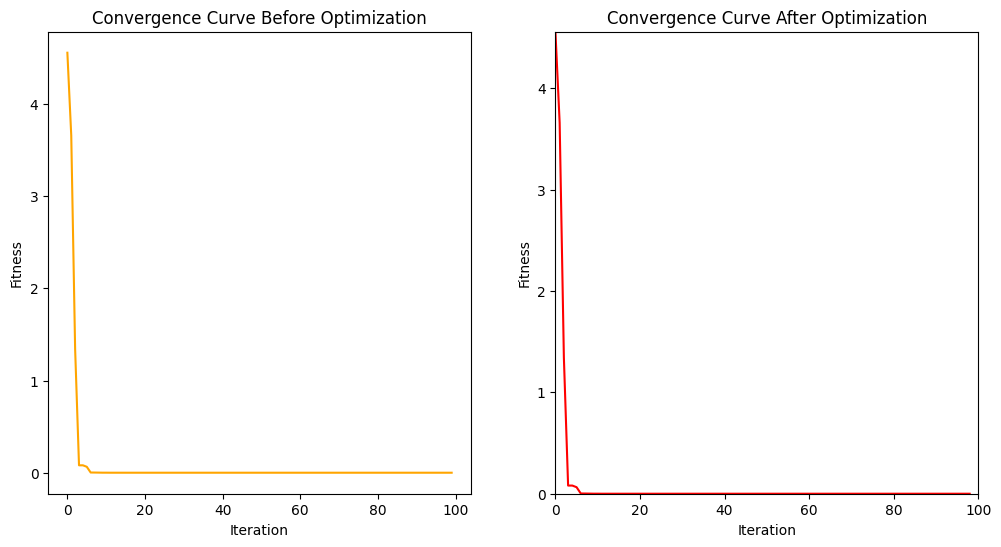

In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Set parameters for Grey Wolf Algorithm
obj_func = objective_function
lb = -5.12
ub = 5.12
dim = 4
search_agent_no = 30
max_iter = 100

# Run Grey Wolf Algorithm
best_pos, convergence_curve = grey_wolf_algorithm(obj_func, lb, ub, dim, search_agent_no, max_iter)

# Initialize the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot convergence curve before optimization
line1, = axs[0].plot(convergence_curve, color='orange')
axs[0].set_title('Convergence Curve Before Optimization')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Fitness')

# Plot convergence curve after optimization
line2, = axs[1].plot([], [], color='red')
axs[1].set_xlim(0, max_iter)
axs[1].set_ylim(min(convergence_curve), max(convergence_curve))
axs[1].set_title('Convergence Curve After Optimization')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Fitness')

# Define the update function for the animation
def update(i):
    line2.set_data(range(i), convergence_curve[:i])
    return line1, line2,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=max_iter, interval=100)

# Save the animation as a gif file
writer = animation.PillowWriter(fps=10)
ani.save('convergence_curve.gif', writer=writer)

# Show the animation
plt.show()

# Training phase of our Neural network model

## Training without optimization

In [10]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers

# Load iris dataset
iris = load_iris()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Define the neural network model
model = tf.keras.Sequential([
  layers.Dense(64, activation='relu', input_shape=(4,)),
  layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the testing set
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)


Epoch 1/10
4/4 [==============================] - 1s 71ms/step - loss: 1.4875 - accuracy: 0.3250 - val_loss: 1.3097 - val_accuracy: 0.3667
Epoch 2/10
4/4 [==============================] - 0s 15ms/step - loss: 1.3075 - accuracy: 0.3250 - val_loss: 1.2198 - val_accuracy: 0.3667
Epoch 3/10
4/4 [==============================] - 0s 17ms/step - loss: 1.2171 - accuracy: 0.3167 - val_loss: 1.1726 - val_accuracy: 0.3333
Epoch 4/10
4/4 [==============================] - 0s 17ms/step - loss: 1.1581 - accuracy: 0.3583 - val_loss: 1.1248 - val_accuracy: 0.3333
Epoch 5/10
4/4 [==============================] - 0s 13ms/step - loss: 1.1062 - accuracy: 0.3667 - val_loss: 1.0635 - val_accuracy: 0.3333
Epoch 6/10
4/4 [==============================] - 0s 16ms/step - loss: 1.0483 - accuracy: 0.4083 - val_loss: 1.0024 - val_accuracy: 0.3333
Epoch 7/10
4/4 [==============================] - 0s 14ms/step - loss: 0.9957 - accuracy: 0.4250 - val_loss: 0.9514 - val_accuracy: 0.6667
Epoch 8/10
4/4 [===========

## Training with optimization

Best solution : [ 0.06211011 14.48955109 56.13619408]
Best parameters:
learning_rate: 0.06211010552363357
batch_size: 14
epochs: 56
1/1 [==============================] - 0s 43ms/step - loss: 0.5009 - accuracy: 0.8000
Accuracy on testing set: 0.800000011920929


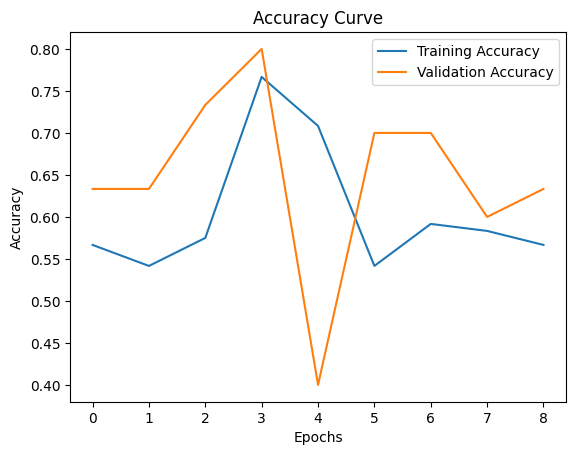

In [13]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from tensorflow.keras import layers, callbacks, regularizers

# Load iris dataset
iris = load_iris()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Define the neural network model with regularization and dropout
model = tf.keras.Sequential([
  layers.Dense(10, activation='relu', input_shape=(4,), kernel_regularizer=regularizers.l2(0.01)),
  layers.Dropout(0.2),
  layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)

# Define objective function for Grey Wolf Algorithm
def objective_function(params):
    learning_rate = params[0]
    batch_size = int(params[1])
    epochs = int(params[2])

    # Train the neural network model
    model.optimizer.learning_rate = learning_rate
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=0, callbacks=[early_stop, reduce_lr])

    # Get the accuracy on the testing set
    accuracy = history.history['val_accuracy'][-1]

    return accuracy

# Define search space for Grey Wolf Algorithm
lb = [0.0001, 10, 10]
ub = [0.1, 100, 100]
dim = 3

# Set parameters for Grey Wolf Algorithm
search_agent_no = 20
max_iter = 10

# Run Grey Wolf Algorithm
best_pos, convergence_curve = grey_wolf_algorithm(objective_function, lb, ub, dim, search_agent_no, max_iter)

print(f"Best solution : {best_pos}")

# Print the best parameters found by the Grey Wolf Algorithm
learning_rate = best_pos[0]
batch_size = int(best_pos[1])
epochs = int(best_pos[2])
print("Best parameters:")
print("learning_rate:", learning_rate)
print("batch_size:", batch_size)
print("epochs:", epochs)

# Train the neural network model with the best parameters
model.optimizer.learning_rate = learning_rate
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=0, callbacks=[early_stop])

# Evaluate the accuracy of the model on the testing set
accuracy = model.evaluate(X_test, y_test)[1]
print("Accuracy on testing set:", accuracy)

# Plot the convergence curve
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
